## Clustering Data

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn import datasets
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [2]:
df=pd.read_csv('film_series.csv')

In [3]:
df.keys()

Index(['Song', 'Movie', 'Link', 'id', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [4]:
df.head()

,Song,Movie,Link,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,track_href,analysis_url,duration_ms,time_signature
0,Our Town,Cars Original Soundtrack (English Version),https://api.spotify.com/v1/tracks/1ENnpCRfGWQL...,1ENnpCRfGWQLVGL9pEyVao,0.491,0.2720,2,-11.627,1,0.0283,0.874,0.000563,0.1270,0.1010,111.642,spotify:track:1ENnpCRfGWQLVGL9pEyVao,https://api.spotify.com/v1/tracks/1ENnpCRfGWQL...,https://api.spotify.com/v1/audio-analysis/1ENn...,247385,4
1,Married Life,Up (Original Motion Picture Soundtrack),https://api.spotify.com/v1/tracks/7iocNjLrxPHL...,7iocNjLrxPHLl8njgRlv5U,0.278,0.0675,0,-20.946,1,0.0400,0.970,0.732000,0.0812,0.1120,82.626,spotify:track:7iocNjLrxPHLl8njgRlv5U,https://api.spotify.com/v1/tracks/7iocNjLrxPHL...,https://api.spotify.com/v1/audio-analysis/7ioc...,250573,3
2,"Reflection - From ""Mulan"" / Soundtrack Version",Mulan,https://api.spotify.com/v1/tracks/2AILbz83cBnr...,2AILbz83cBnrAMAG06rZts,0.255,0.1740,9,-19.217,1,0.0379,0.805,0.009110,0.3350,0.0829,80.707,spotify:track:2AILbz83cBnrAMAG06rZts,https://api.spotify.com/v1/tracks/2AILbz83cBnr...,https://api.spotify.com/v1/audio-analysis/2AIL...,146760,4
3,"Colors of the Wind - From ""Pocahontas"" / Sound...",Pocahontas,https://api.spotify.com/v1/tracks/1OYOLWqKmhkF...,1OYOLWqKmhkFIx2KC9ek1a,0.272,0.1640,1,-17.040,1,0.0460,0.929,0.001100,0.1090,0.2280,81.551,spotify:track:1OYOLWqKmhkFIx2KC9ek1a,https://api.spotify.com/v1/tracks/1OYOLWqKmhkF...,https://api.spotify.com/v1/audio-analysis/1OYO...,214400,3
4,"Ma Belle Evangeline - From ""The Princess and t...",The Princess and the Frog,https://api.spotify.com/v1/tracks/2P8QqrZ42YNP...,2P8QqrZ42YNP8Ao5uRMLO0,0.378,0.3520,3,-8.745,1,0.0354,0.812,0.000005,0.1060,0.3060,139.491,spotify:track:2P8QqrZ42YNP8Ao5uRMLO0,https://api.spotify.com/v1/tracks/2P8QqrZ42YNP...,https://api.spotify.com/v1/audio-analysis/2P8Q...,115693,5


In [5]:
feat_clean=pd.read_csv('feat_clean.csv')

In [6]:
feat_clean.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.491,0.2720,2,-11.627,1,0.0283,0.874,0.000563,0.1270,0.1010,111.642,247385,4
1,0.278,0.0675,0,-20.946,1,0.0400,0.970,0.732000,0.0812,0.1120,82.626,250573,3
2,0.255,0.1740,9,-19.217,1,0.0379,0.805,0.009110,0.3350,0.0829,80.707,146760,4
3,0.272,0.1640,1,-17.040,1,0.0460,0.929,0.001100,0.1090,0.2280,81.551,214400,3
4,0.378,0.3520,3,-8.745,1,0.0354,0.812,0.000005,0.1060,0.3060,139.491,115693,5


In [8]:
song_std = StandardScaler().fit_transform(feat_clean)
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(song_std)
pca_df = pd.DataFrame(principalComponents)

In [14]:
distortions = []
K = range(2,200)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=1000)
    kmeanModel.fit(pca_df)
    distortions.append(kmeanModel.inertia_)

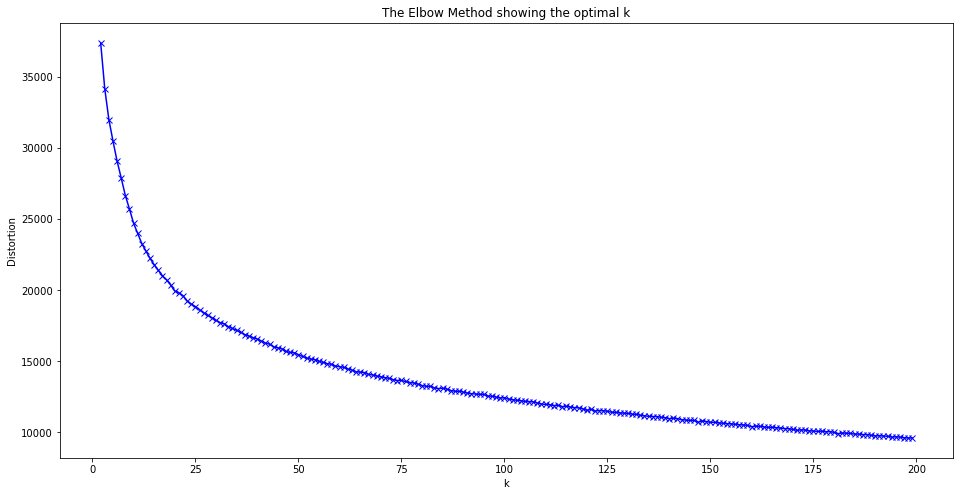

In [15]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [16]:
sil = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=1000)
    kmeanModel.fit(pca_df)
    labels = kmeanModel.labels_
    sil.append(silhouette_score(feat_clean, labels, metric = 'euclidean'))

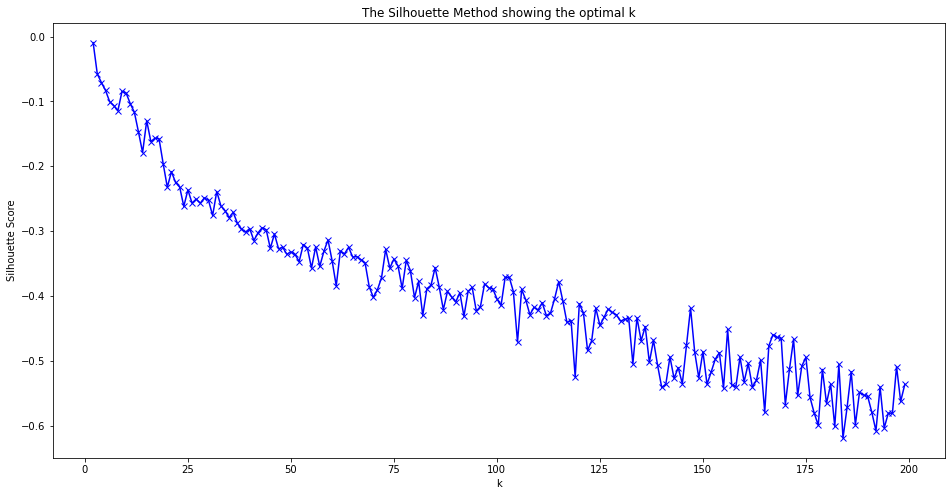

In [17]:
plt.figure(figsize=(16,8))
plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the optimal k')
plt.show()